# 🌋 Impact Visualization Challenge  
## USGS地震データによるインパクト可視化

本ノートブックでは、USGS（米国地質調査所）のライブ地震データを用いて、
マグニチュード・深さ・発生位置から「インパクト（影響の大きさ）」を感じる可視化を行います。

- 大きな地震・浅い地震ほど「インパクト」が大きいと定義  
- 地図上で世界中の地震を可視化  
- 散布図でマグニチュードと深さの関係を分析  


In [1]:
import pandas as pd
import requests

# USGSの過去1日の地震データ（GeoJSON形式）
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
data = requests.get(url).json()

# DataFrame化
features = data['features']
df = pd.DataFrame([{
    'place': f['properties']['place'],
    'magnitude': f['properties']['mag'],
    'time': pd.to_datetime(f['properties']['time'], unit='ms'),
    'longitude': f['geometry']['coordinates'][0],
    'latitude': f['geometry']['coordinates'][1],
    'depth': f['geometry']['coordinates'][2]
} for f in features])

# インパクトスコア（浅くて大きいほど高い）
df['impact_score'] = df['magnitude'] / (df['depth'] + 1) * 100
df = df.dropna(subset=['magnitude', 'depth'])
df.head()


,place,magnitude,time,longitude,latitude,depth,impact_score
0,"11 km N of Cabazon, CA",1.24,2025-11-11 07:08:35.890,-116.766334,34.011333,12.6600,9.077599
1,"2 km SW of Garden City, Texas",1.30,2025-11-11 07:06:59.634,-101.503000,31.849000,2.2083,40.519902
2,"21 km WNW of Chenega, Alaska",2.00,2025-11-11 07:00:57.247,-148.385800,60.120800,0.0000,200.000000
3,"13 km S of Arroyo, Puerto Rico",3.06,2025-11-11 06:23:09.030,-66.065667,17.840333,10.8600,25.801012
4,"2 km NNW of West Bishop, CA",1.68,2025-11-11 06:13:14.300,-118.464500,37.378834,10.5400,14.558059


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) mi

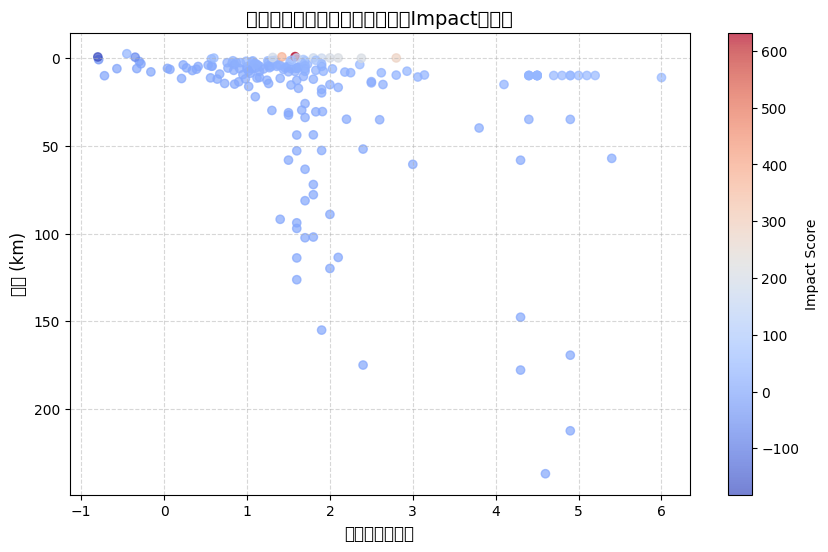

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sc = plt.scatter(df['magnitude'], df['depth'], 
                 c=df['impact_score'], cmap='coolwarm', alpha=0.7)
plt.colorbar(sc, label='Impact Score')
plt.gca().invert_yaxis()
plt.xlabel('マグニチュード', fontsize=12)
plt.ylabel('深さ (km)', fontsize=12)
plt.title('地震のマグニチュードと深さ（Impact強調）', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [6]:
# ...existing code...
try:
    import folium
except ModuleNotFoundError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "folium"])
    import folium

m = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodb positron')

def color_by_magnitude(mag):
    if mag < 4.0: return 'green'
    elif mag < 6.0: return 'orange'
    else: return 'red'

# ...existing code...
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3 + (row['magnitude'] or 0),
        color=color_by_magnitude(row['magnitude'] or 0),
        fill=True,
        fill_opacity=0.7,
        tooltip=f"<b>{row['place']}</b><br>M{row['magnitude']}<br>深さ: {row['depth']} km"
    ).add_to(m)

m
# ...existing code...



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [folium]



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


## 📝 サマリー（200〜400字）

USGSのライブ地震データを用いて、世界中の地震の規模・深さ・発生位置を可視化した。
マグニチュードが大きく、かつ浅い地震は地表への影響が強く、「Impact Score」として数値化した。
散布図では、浅い地震ほどImpactが高いことが視覚的に確認できた。
また、地図上のプロットでは地球全体での地震分布と、特に環太平洋地域に集中する傾向を直感的に理解できた。
この分析を通じて、単なる地震情報の羅列ではなく、地球規模での“影響の可視化”が重要であると感じた。
特にデータ可視化によって、科学的な事実と人間的な感覚（インパクト）をつなぐ新しい洞察を得られた。
